# Deployment

In [1]:
from random_geometry_points.plane import Plane
import numpy as np
import pandas as pd
import random
import math

from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

## Define deployment parameters

In [2]:
# Deployment area size
A1 = 1000
A2 = 100000
A3 = 25000000

A4 = 100000000

In [3]:
# Number of nodes
# including gateway
S1 = 10
S2 = 50
S3 = 100
S4 = 1000

In [4]:
#Deployment configuration 
nNodes = S1
area = A1

## Base scenario:
# nNodes = S1
# area = A1

In [5]:
# Function that defines xDist and yDist from the area size
# It finds two integer factors as close to a square as possible, i.e., two integers that results in the area size
# Adapted from 
# https://stackoverflow.com/questions/39248245/factor-an-integer-to-something-as-close-to-a-square-as-possible
def factor_int(area):
    xDist = math.ceil(math.sqrt(area))
    yDist = int(area/xDist)
    while xDist * yDist != float(area):
        xDist -= 1
        yDist = int(area/xDist)
    return xDist, yDist

# Using two integer factors as close to a square as possible
xDist, yDist = factor_int(area)
xDist, yDist

(25, 40)

In [6]:
if(area == A1):
    xDist = 33
    yDist = 30
xDist, yDist

if(area == A2):
    xDist = 330
    yDist = 300
xDist, yDist

(33, 30)

## Define deployment plane parameters

In [7]:
# Defining the deployment plane
# according to a defined normal vector 
# and xDist, yDist, and zDist

# Vector normal to the plane
normal_vec = (1.0, 1.0, 1.0)
normal_vec = np.array(normal_vec)

# Point of reference
#ref_point = (0.0, 0.0, 0.0)
ref_point = (1.0, 1.0, 1.0)
ref_point = np.array(ref_point)

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal_vec. Thus, we have to calculate
# d and we're set
d = -ref_point.dot(normal_vec)

## Create plane to support plotting

In [8]:
# create x,y
xx, yy = np.meshgrid(range(int(-xDist/2), int(xDist/2)), range(int(-yDist/2),int(yDist/2)))

# calculate corresponding z, in respect with the normal vector to the defined plane
zz = (-normal_vec[0] * xx - normal_vec[1] * yy - d) * 1. / normal_vec[2]

-----------------------------------

# Ploting deployments

-----------------------------------

## Grid deployment

In [9]:
# Read .csv that stores the N random points
name = f'deployment_grid_nodes_{nNodes}_area_{area}.csv'
df_grid = pd.read_csv(name, sep=',', header=None, names=['x', 'y', 'z'])
print(f"Nodes: {nNodes}")
print(f"Area: {area}")
df_grid

Nodes: 10
Area: 1000


x          y          z
0 -17.759305 -15.868092  35.478759
1  -5.546745 -12.137457  19.376344
2   7.164834  -8.913442   5.761297
3 -16.176677  -6.417216  22.794278
4  -4.180252  -2.607248  10.235523
5   5.001444  -1.428291  -5.916834
6 -17.043729   4.876497  13.327327
7  -6.005008   9.231481   0.765939
8   5.617724  13.150552 -13.664929
9   0.000000   0.000000   3.000000

In [10]:
# Gateway position
x_gateway = df_grid.iloc[-1].x
y_gateway = df_grid.iloc[-1].y
z_gateway = df_grid.iloc[-1].z

# Calculate distance from nodes to gateway to plot its color accordingly
distance = df_grid[:-1].apply(lambda node: 
                                        math.sqrt((node.x - x_gateway)**2
                                                  +(node.y - y_gateway)**2
                                                  +(node.z - z_gateway)**2), axis=1)

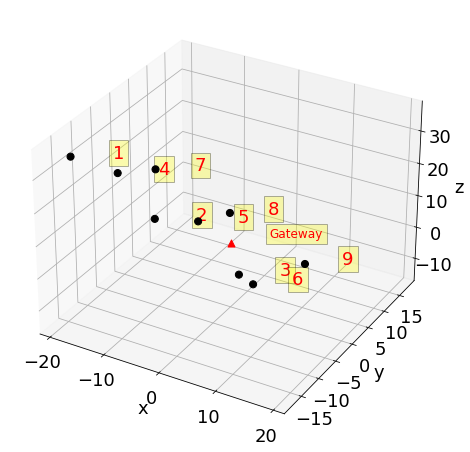

<Figure size 432x288 with 0 Axes>

In [26]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.constrained_layout.use'] = True

# Create the figure
fig = plt.figure(figsize=(8,8), constrained_layout=True)
# Add an axes
plt3d = fig.gca(projection='3d')

# Plot the plane
#plt3d.plot_surface(xx, yy, zz, alpha=0.1)

# Plot the points
plt3d.scatter3D(df_grid[:-1]['x'], 
                df_grid[:-1]['y'], 
                df_grid[:-1]['z'],
                s=50,
                color='black', 
                alpha=1);
                #cmap='Greens_r');

# Plot gateway
plt3d.scatter(x_gateway, y_gateway, z_gateway, s=50, marker='^', color='r', alpha=1, depthshade=False);

# Adding node labels
for node, row in df_grid[:-1].iterrows():
    x_text = row['x']
    y_text = row['y']
    z_text = row['z']
    plt3d.text(x_text+4, y_text+5, z_text-3, '{}'.format(node+1), 
              fontdict=dict(color='red'),
              bbox=dict(facecolor='yellow',alpha=0.3))
    
# Adding gateway label
x_text = x_gateway
y_text = y_gateway
z_text = z_gateway
plt3d.text(x_text+4, y_text+5, z_text-1, 'Gateway', 
          fontdict=dict(color='red', size=12),
          bbox=dict(facecolor='yellow',alpha=0.3))

plt3d.set_xlabel('x')
plt3d.set_ylabel('y')
plt3d.set_zlabel('z')

plt3d.set_xlim(int((-xDist/2)*1.3), int((xDist/2)*1.3))
plt3d.set_ylim(int((-yDist/2)*1.3), int((yDist/2)*1.3))

plt.title('')
#plt.title(f'Visualização da implantação em grade \n com {df_grid.index.size} nós')
plt.show()

for i in range(0,360,15):
    plt3d.view_init(elev=20, azim=i)
    plt.tight_layout()
    fig.savefig("fig/grid%d.png" % i, bbox_inches='tight')

## Random deployment

In [12]:
# Write .csv that stores the N random points
name = f'deployment_random_nodes_{nNodes}_area_{area}.csv'
df_random = pd.read_csv(name, sep=',', header=None, names=['x', 'y', 'z'])
print(f"Nodes: {nNodes}")
print(f"Area: {area}")
df_random

Nodes: 10
Area: 1000


x          y          z
0  16.460209   9.796114 -21.112467
1   1.866561  10.782837 -11.294130
2   8.260436  13.041004 -20.218295
3   4.655926  14.604417 -15.939417
4   7.751392 -13.302441   7.153405
5  -8.749208  -2.024631  16.562757
6  -9.746642  -7.845840  20.908307
7 -11.584284  -0.194313  14.467593
8  15.360082   4.481630 -15.809354
9   0.000000   0.000000   3.000000

In [13]:
# Gateway position
x_gateway = df_random.iloc[-1].x
y_gateway = df_random.iloc[-1].y
z_gateway = df_random.iloc[-1].z


# Calculate distance from nodes to gateway to plot its color accordingly
distance = df_random[:-1].apply(lambda node: 
                                        math.sqrt((node.x - x_gateway)**2
                                                  +(node.y - y_gateway)**2
                                                  +(node.z - z_gateway)**2), axis=1)

In [14]:
from adjustText import adjust_text

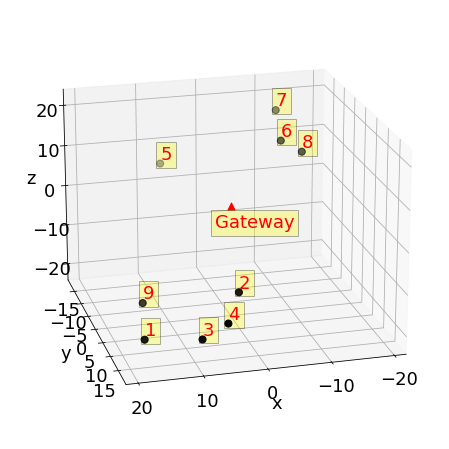

<Figure size 432x288 with 0 Axes>

In [15]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.constrained_layout.use'] = True

# Create the figure
fig = plt.figure(figsize=(8,8), constrained_layout=True)
# Add an axes
plt3d = fig.gca(projection='3d')

# Plot the plane
#plt3d.plot_surface(xx, yy, zz, alpha=0.1)

# Plot the points
plt3d.scatter3D(df_random[:-1]['x'], 
                df_random[:-1]['y'], 
                df_random[:-1]['z'],
                s=50,
                color='black')
                #cmap='Greens_r');

# Plot gateway
plt3d.scatter(x_gateway, y_gateway, z_gateway, s=50, marker='^', color='r');

# Adding node labels
# for node, row in df_random[:-1].iterrows():
#     x_text = row['x']
#     y_text = row['y']
#     z_text = row['z']
#     plt3d.text(x_text+4, y_text+5, z_text-3, '{}'.format(node+1), 
#               fontdict=dict(color='red'),
#               bbox=dict(facecolor='yellow',alpha=0.3))
plt3d.view_init(elev=20, azim=75)
labels = [
          plt3d.text(row['x'], row['y'], row['z'], str(node+1), 
          fontdict=dict(color='red'),
          bbox=dict(facecolor='yellow',alpha=0.3)) for node, row in df_random[:-1].iterrows()
         ]
adjust_text(labels, autoalign=True)
    
# Adding gateway label
x_text = x_gateway
y_text = y_gateway
z_text = z_gateway
plt3d.text(x_text+4, y_text+5, z_text-2, 'Gateway', 
          fontdict=dict(color='red'),
          bbox=dict(facecolor='yellow',alpha=0.3))

plt3d.set_xlabel('x')
plt3d.set_ylabel('y')
plt3d.set_zlabel('z')

plt3d.set_xlim(int((-xDist/2)*1.3), int((xDist/2)*1.3))
plt3d.set_ylim(int((-yDist/2)*1.3), int((yDist/2)*1.3))

plt.title('')
#plt.title(f'Visualização da implantação em grade \n com {df_random.index.size} nós')

plt.show()

for i in range(0,360,15):
    plt3d.view_init(elev=20, azim=i)
    plt.tight_layout()
    fig.savefig("fig/random%d.png" % i, bbox_inches='tight')